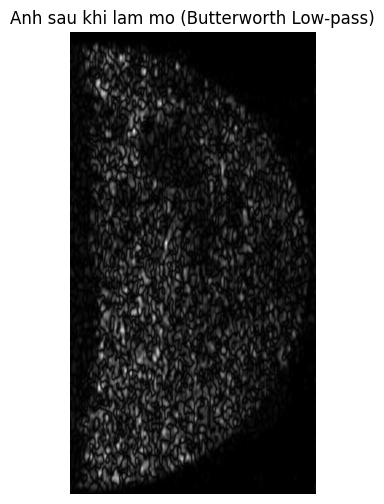

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Doc anh xam va chuyen sang kieu float
f = Image.open(r'C:\ImageProcessing\Doan-xulyanh\img\moon.jpg').convert('L')
f = np.array(f, dtype=float)

# Kich thuoc anh
P, Q = f.shape

# Tham so bo loc Butterworth
D0 = 40.0  # tan so cat
n = 2      # bac bo loc

# Tao bo loc thong thap Butterworth
h = np.zeros((P, Q))
for i in range(P):
    for j in range(Q):
        u = np.sqrt((i - P / 2)**2 + (j - Q / 2)**2)
        h[i, j] = 1 / (1 + (u / D0)**(2 * n))

# Ap dung bo loc trong mien tan so
F = np.fft.fft2(f)
F_shift = np.fft.fftshift(F)
H = np.fft.fftshift(h)
G = H * F_shift
g = np.abs(np.fft.ifft2(np.fft.ifftshift(G)))

# Hien thi anh sau khi lam mo
plt.figure(figsize=(6, 6))
plt.imshow(g, cmap='gray')
plt.title('Anh sau khi lam mo (Butterworth Low-pass)')
plt.axis('off')
plt.show()
